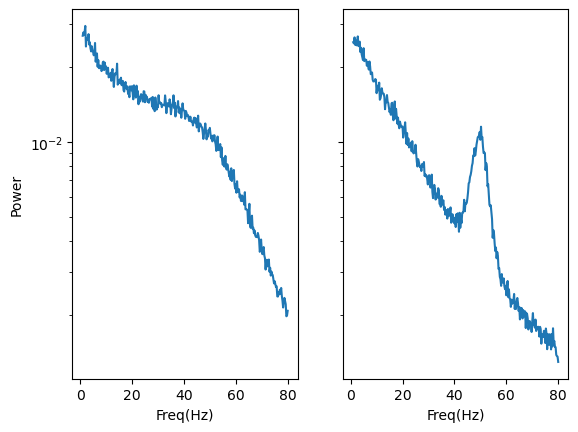

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# Import the FOOOF object
from fooof import FOOOF

# Import simulation, utility, and plotting tools
from fooof.bands import Bands
from fooof.utils import trim_spectrum
from fooof.analysis import get_band_peak_fm
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra_shading

bands = Bands({'delta' : [1, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 35],
               'gamma' : [35, 80]})

# Define the frequency range to simulate across
freq_range = [1, 80]
# Define the frequency resolution to simulate with
freq_res = 0.25
# Define the amount of noise to add to the spectrum
nlv = 0.02
# Define aperiodic params, as [offset, knee, exponent]
aperiodic_params = [1, 500, 2]
# Define periodic params, as a flat list of [CF, PW, BW] for each peak
pe_g1 = [[50, 0.5, 20],[1,0.1,3]]
pe_g2 = [[50, 0.5, 3.5],[1,0.1,4]]

freqs1, spectrum1 = gen_power_spectrum(freq_range, aperiodic_params, pe_g1, nlv,freq_res)
freqs2, spectrum2 = gen_power_spectrum(freq_range, aperiodic_params, pe_g2, nlv,freq_res)

fig, ax = plt.subplots(nrows=1, ncols=2,sharex=True,sharey=True)
ax[0].plot(freqs1,spectrum1)
ax[0].set_xlabel('Freq(Hz)')
ax[0].set_ylabel("Power")
ax[0].set_yscale('log')
ax[1].plot(freqs2,spectrum2)
ax[1].set_xlabel('Freq(Hz)')
plt.show()



In [26]:
model1 = FOOOF(verbose=False)
model2 = FOOOF(verbose=False)

model1.fit(freqs1,spectrum1)
model2.fit(freqs2,spectrum2)


pw_template = ("The difference of {:5} power is  {: 1.2f}\t"
               "with peaks or  {: 1.2f}\t with bands.")

def compare_peak_pw(fm1, fm2, band_def):
    """Compare the power of detected peaks."""

    pw1 = get_band_peak_fm(fm1, band_def)[1]
    pw2 = get_band_peak_fm(fm2, band_def)[1]

    return pw1 - pw2

def compare_band_pw(fm1, fm2, band_def):
    """Compare the power of frequency band ranges."""

    pw1 = np.mean(trim_spectrum(fm1.freqs, fm1.power_spectrum, band_def)[1])
    pw2 = np.mean(trim_spectrum(fm2.freqs, fm2.power_spectrum, band_def)[1])

    return pw1 - pw2

for label, definition in bands:
    print(pw_template.format(label,
                             compare_peak_pw(model1, model2, definition),
                             compare_band_pw(model2, model2, definition)))

The difference of delta power is   nan	with peaks or   0.00	 with bands.
The difference of theta power is   nan	with peaks or   0.00	 with bands.
The difference of alpha power is   nan	with peaks or   0.00	 with bands.
The difference of beta  power is   0.04	with peaks or   0.00	 with bands.
The difference of gamma power is  -0.20	with peaks or   0.00	 with bands.


You can see a printed out way to characterize how much or how little the power changed between two signals